#  **Análisis y Predicción de Datos Meteorológicos con Métodos de Interpolación**
### Alejandro Chávez - 32.278.392
### Cesar Dominguez - 30.640.838
### José Santana - 31.608.829

En el presente proyecto estaremos analizando con distintos métodos de Interpolación, las temperaturas de una ciudad, con el fin de modelar e intentar predecir estos datos meteorológicos.

Los metodos de interpolación que emplearemos son:
* Interpolación de Taylor
* Interpolación de Lagrange
* Interpolación de Hermite
* Interpolación Polinómica a Trozos
---
## **Generación de datos**

Para la generación de datos utilizaremos como referencia la ciudad de Valencia, Carabobo (Ubicada en Venezuela), ciudad la cual mantiene una temperatura dentro de un rango comprendido por el valor de la temperatura mínima (20°c) y el valor de la temperatura máxima (30°c) de la última semana en la ciudad. Por lo tanto utilizaremos una función que pueda comprender entre dichos valores. La función a utilizar será:

**y(x)=5⋅sin(x)+25**

In [2]:
lista = []
for x in 1:7
    push!(lista,5 * sin(x) + 25)
end
println(lista)

Any[29.207354924039482, 29.54648713412841, 25.705600040299338, 21.21598752346036, 20.205378626684308, 23.60292250900537, 28.284932993593944]


A continuación se graficará los valores de temperaturas obtenidos en 7 días

In [ ]:
#Instalar paquetes necesarios (Solo hacer 1 vez, puede tardar más o menos 1 minutos)
using Pkg
Pkg.add("Plots")
using Plots

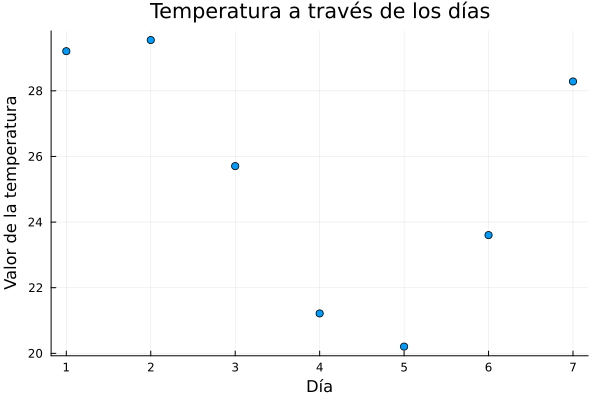

In [3]:
x = 1:length(lista)
y = lista
scatter(x, y, xlabel="Día", ylabel="Valor de la temperatura", title="Temperatura a través de los días", legend=false, marker=:circle)

---
## **Interpolación de Taylor**

La interpolación de Taylor es una técnica matemática que usa la serie de Taylor para aproximar una función mediante un polinomio, basado en la función y sus derivadas en un punto específico.

![Polinomio de Taylor](../../resources/polinomio-taylor.png)

Para la interpolación de Taylor se nos pide escoger un punto especifico para estos datos. Por lo que escogeremos el valor de de f(x=1), es decir escogeremos el valor de la función para el primer día. Para el valor de N escogeremos el mismo del total de días que hemos evaluado, es decir N = 7

In [ ]:
#Tendremos acceso a la libreria Sympy
using Pkg
Pkg.add("SymPy")
using SymPy

In [19]:
x= symbols("x")
f= 5*sin(x)+25
taylor = f.subs(x,1)
for k in 1:7
    derivada = diff(f,x)
    taylor = taylor + derivada.subs(x,1) * ((x-1)^k)/factorial(k)
    f = derivada
end
print(expand(taylor))

-x^7*cos(1)/1008 - x^6*sin(1)/144 + x^6*cos(1)/144 + x^5*cos(1)/48 + x^5*sin(1)/24 - 25*x^4*cos(1)/144 + 5*x^4*sin(1)/48 - 25*x^3*sin(1)/36 - 65*x^3*cos(1)/144 - 65*x^2*sin(1)/48 + 101*x^2*cos(1)/48 + 389*x*cos(1)/144 + 101*x*sin(1)/24 - 4241*cos(1)/1008 + 389*sin(1)/144 + 25